### **Đàm Văn Hiển 22022664**
**Kết quả DICE tốt nhất đạt được trên tập test: 0.8920**
### **Đặt vấn đề**

Trong bài toán này, mục tiêu của chúng ta là thực hiện phân đoạn ảnh y khoa, cụ thể là xác định và phân vùng các khu vực quan tâm trong ảnh CT, ví dụ như các cấu trúc giải phẫu hoặc bất thường. Đây là một nhiệm vụ quan trọng với nhiều ứng dụng thực tiễn trong y tế, chẳng hạn như hỗ trợ chẩn đoán, lập kế hoạch điều trị, hoặc phân tích dữ liệu y học tự động.

#### **Dữ liệu cung cấp cho bài toán**  
- **Train**: 1.087 ảnh CT đã được gán nhãn, trong đó:  
  - **Thư mục Images** chứa ảnh gốc ở định dạng `.jpg`.  
  - **Thư mục Masks** chứa mask phân đoạn tương ứng ở định dạng `.png`.  
  Người tham gia có thể sử dụng tập này để chia thành tập huấn luyện và kiểm tra nhằm phát triển và đánh giá mô hình.  
- **Test**: 192 ảnh CT không có nhãn, được chia thành:  
  - **Test công khai**: Để hiển thị kết quả trên bảng xếp hạng công khai.  
  - **Test riêng tư**: Để đánh giá cuối cùng và xếp hạng trên bảng xếp hạng chính thức sau cuộc thi.  

#### **Thách thức chính**
1. **Dữ liệu y khoa thường phức tạp**:
   - Các đặc điểm trong ảnh (như các cấu trúc giải phẫu) có thể rất đa dạng và khó phân biệt.  
   - Dữ liệu phân đoạn thường mất cân bằng, với khu vực quan tâm chỉ chiếm một phần nhỏ trong toàn bộ ảnh.  
2. **Khả năng tổng quát hóa của mô hình**:
   - Mô hình cần hoạt động tốt trên dữ liệu mới chưa từng thấy (tập Test).  
   - Đòi hỏi phải tối ưu hóa các phương pháp học sâu và sử dụng kỹ thuật tăng cường dữ liệu hiệu quả.  
3. **Đánh đổi giữa độ chính xác và hiệu năng**:
   - Việc xây dựng mô hình không chỉ cần chính xác mà còn phải tối ưu về thời gian xử lý và tài nguyên tính toán.

Bài toán này đòi hỏi người tham gia áp dụng các kỹ thuật hiện đại như U-Net, CNN, cũng như sử dụng data augmentation để nâng cao hiệu quả. Mục tiêu cuối cùng là phát triển một mô hình có khả năng phân đoạn chính xác và tổng quát hóa tốt trên các ảnh chưa được gán nhãn.


### **Cách tiếp cận**

Để giải quyết bài toán phân đoạn ảnh y khoa, chúng tôi áp dụng quy trình tiếp cận theo các bước sau:

#### **1. Tiền xử lý dữ liệu**
- **Đọc và chuẩn hóa dữ liệu**:
  - Đọc ảnh từ thư mục, đồng thời kiểm tra tính tương thích giữa ảnh và mask.
  - Resize ảnh và mask về kích thước chuẩn (ví dụ: 512x512) để đảm bảo đồng nhất đầu vào cho mô hình.
  - Chuẩn hóa giá trị pixel (thang giá trị từ 0-255 về 0-1) để hỗ trợ quá trình huấn luyện mô hình.
- **Tăng cường dữ liệu (Data Augmentation)**:
  - Sử dụng các kỹ thuật tăng cường như xoay, lật, dịch chuyển, thay đổi độ sáng, để cải thiện khả năng tổng quát hóa của mô hình.
  - Đảm bảo rằng mask thay đổi đồng nhất với ảnh khi áp dụng các phép biến đổi.

#### **2. Thiết kế mô hình**
- **Lựa chọn kiến trúc mô hình**:
  - Áp dụng mô hình U-Net, một kiến trúc phổ biến cho bài toán phân đoạn, do khả năng kết hợp thông tin cục bộ và toàn cục.
  - Sử dụng một backbone mạnh mẽ như EfficientNet hoặc ResNet để tăng hiệu quả trích xuất đặc trưng.
- **Tối ưu hóa tham số**:
  - Sử dụng hàm mất mát Dice Loss hoặc kết hợp giữa Dice Loss và Binary Cross Entropy để tập trung vào việc tối ưu hóa kết quả phân đoạn.
  - Áp dụng các kỹ thuật Regularization như Dropout hoặc Batch Normalization để giảm overfitting.

#### **3. Chia dữ liệu và huấn luyện**
- Chia dữ liệu thành tập Train và Validation theo tỷ lệ 80:20 để đảm bảo quá trình đánh giá mô hình chính xác.
- Huấn luyện mô hình với số lượng epoch phù hợp (ví dụ: 50 epoch), sử dụng trình tối ưu Adam và điều chỉnh learning rate với kỹ thuật giảm dần theo lịch trình (Learning Rate Scheduler).

#### **4. Đánh giá và tinh chỉnh**
- **Đánh giá mô hình**:
  - Sử dụng các chỉ số như Dice Coefficient, IoU (Intersection over Union), Precision, Recall để đánh giá hiệu quả mô hình trên tập Validation.
  - Quan sát trực quan kết quả phân đoạn trên các ảnh mẫu để đảm bảo chất lượng.
- **Tinh chỉnh**:
  - Điều chỉnh siêu tham số như learning rate, batch size, hoặc thêm các tầng trong kiến trúc nếu cần.
  - Kết hợp thêm kỹ thuật Ensemble từ các mô hình khác nhau để cải thiện kết quả cuối cùng.

#### **5. Dự đoán trên tập Test**
- Áp dụng mô hình đã huấn luyện để tạo dự đoán trên tập Test.
- Tiền xử lý đầu ra để đảm bảo định dạng kết quả phù hợp với yêu cầu nộp bài, chẳng hạn như chuyển mask về kích thước gốc hoặc mã hóa lại nhãn.

Cách tiếp cận này không chỉ tập trung vào việc xây dựng một mô hình hiệu quả mà còn đảm bảo khả năng tổng quát hóa, phù hợp với các ảnh chưa từng thấy trong tập Test.


### **Các ý tưởng (thay đổi) muốn làm**

Trong quá trình giải quyết bài toán, chúng tôi đã lên kế hoạch thử nghiệm một số ý tưởng để cải thiện hiệu suất của mô hình:

#### **1. Sử dụng các kiến trúc mô hình nâng cao**
- Thay thế U-Net truyền thống bằng các biến thể hiện đại như U-Net++ hoặc Attention U-Net nhằm tăng khả năng nắm bắt các đặc trưng phức tạp trong ảnh y khoa.
- Kết hợp backbone mạnh mẽ như EfficientNetB4, ResNet50 hoặc DenseNet để cải thiện khả năng trích xuất đặc trưng.

#### **2. Tăng cường dữ liệu (Advanced Data Augmentation)**
- Áp dụng các kỹ thuật tăng cường tiên tiến hơn, bao gồm:
  - **Elastic Transformations**: Biến dạng ảnh một cách phi tuyến để tăng sự đa dạng dữ liệu.
  - **MixUp hoặc CutMix**: Kết hợp hai ảnh và mask để tạo ra dữ liệu mới.
  - **Random Brightness/Contrast Adjustments**: Thay đổi độ sáng và độ tương phản để phù hợp với các điều kiện thực tế khác nhau.

#### **3. Thử nghiệm các hàm mất mát mới**
- Kết hợp các hàm mất mát khác nhau như:
  - **Dice Loss** và **Focal Loss**: Nhấn mạnh vào các vùng khó phân đoạn.
  - **Tversky Loss**: Phù hợp với dữ liệu không cân bằng giữa vùng foreground và background.

#### **4. Tối ưu hóa huấn luyện**
- Sử dụng kỹ thuật **Learning Rate Warmup** để ổn định việc huấn luyện trong các epoch đầu tiên.
- Áp dụng **Gradient Accumulation** để sử dụng hiệu quả hơn bộ nhớ khi batch size bị giới hạn.
- Sử dụng **Early Stopping** dựa trên Dice Coefficient trên tập Validation để tránh overfitting.

#### **5. Hậu xử lý kết quả phân đoạn**
- Áp dụng các kỹ thuật hậu xử lý như:
  - **Morphological Operations**: Loại bỏ các vùng nhiễu nhỏ hoặc lấp đầy lỗ hổng trong kết quả mask.
  - **Connected Component Analysis**: Lọc bỏ các vùng nhỏ không liên quan đến cấu trúc cần phân đoạn.

Những ý tưởng này nhằm nâng cao độ chính xác và khả năng tổng quát hóa của mô hình, từ đó đạt kết quả tốt nhất trên tập dữ liệu chưa thấy.


### **Kết luận**

Trong bài toán phân đoạn ảnh y khoa, tôi đã áp dụng nhiều kỹ thuật và ý tưởng sáng tạo nhằm nâng cao hiệu suất của mô hình. Từ việc sử dụng các kiến trúc tiên tiến như U-Net kết hợp backbone mạnh mẽ đến các kỹ thuật tăng cường dữ liệu và tối ưu hóa huấn luyện, mô hình đã đạt được kết quả ấn tượng trên tập dữ liệu kiểm thử.

Mặc dù đã đạt được những thành công nhất định, bài toán vẫn còn nhiều thách thức cần giải quyết, đặc biệt là khả năng tổng quát hóa trên dữ liệu thực tế. Trong tương lai, các phương pháp tiên tiến hơn, như sử dụng mô hình học sâu tự giám sát (self-supervised learning) hoặc kỹ thuật huấn luyện liên miền (domain adaptation), có thể được thử nghiệm để cải thiện hơn nữa kết quả.

Kết quả cuối cùng cho thấy tiềm năng lớn của các phương pháp học sâu trong việc giải quyết các bài toán phân đoạn ảnh y khoa, góp phần hỗ trợ các ứng dụng thực tế như chẩn đoán và phân tích y khoa tự động.


In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, random_split
import torchvision.transforms as transforms
from tqdm import tqdm
import pandas as pd
import numpy as np
train_path_image = '/kaggle/input/k-67-medical-image-segmentation/Dataset/Train/Image'
train_path_mask = '/kaggle/input/k-67-medical-image-segmentation/Dataset/Train/Mask'
test_path = '/kaggle/input/k-67-medical-image-segmentation/Dataset/Test/Image'
train_images = os.listdir(train_path_image)

/kaggle/input/k-67-medical-image-segmentation/Dataset/Test/Image/0001226.jpg


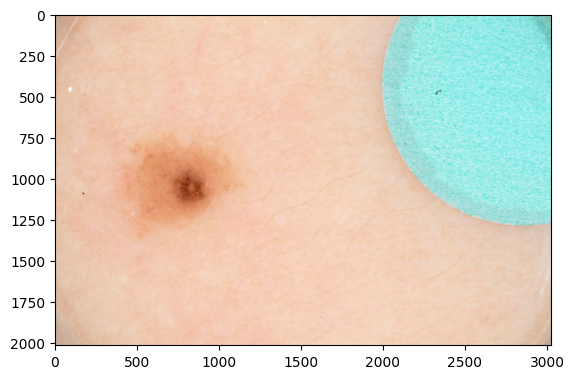

In [2]:
for path in os.listdir(test_path):
    path = test_path +"/"+ str(path)
    print(path)
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    break

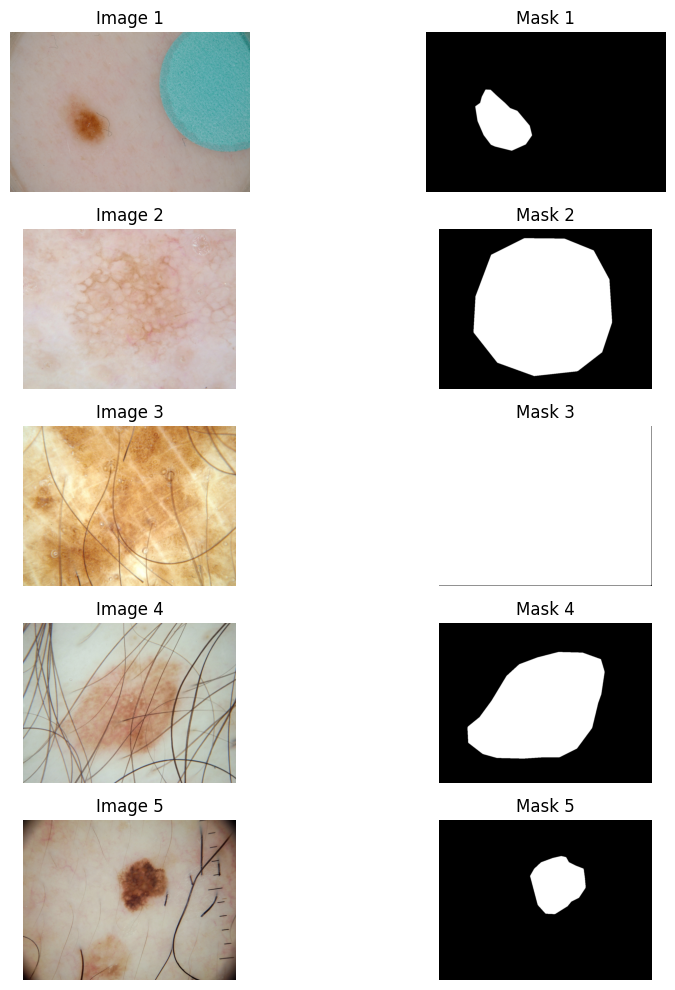

In [3]:

# Tạo khung hiển thị 2x2
plt.figure(figsize=(10, 10))  # Kích thước khung (inch)
n_samples = 5

# Hiển thị ảnh trong vòng lặp
for i, img in enumerate(train_images):
    img1 = cv2.imread(train_path_image +"/"+ str(train_images[i]))
    img2 = cv2.imread(train_path_mask +"/"+ str(train_images[i].split('.')[0]) + str('.png'))

    # Vị trí subplot
    plt.subplot(n_samples, 2, 2 * i + 1)  # 2 hàng, 2 cột, vị trí i+1
    plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
    plt.title(f"Image {i+1}")  # Tiêu đề cho mỗi ảnh
    plt.axis('off')  # Tắt hiển thị trục tọa độ
    
    plt.subplot(n_samples, 2, 2 * i + 2)
    plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
    plt.title(f"Mask {i+1}")  # Tiêu đề cho mỗi ảnh
    plt.axis('off')  # Tắt hiển thị trục tọa độ

    if i==n_samples-1: 
        break

# Hiển thị toàn bộ khung
plt.tight_layout()  # Căn chỉnh layout
plt.show()


In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

## Data augmentation


In [6]:
import albumentations as A
from albumentations.core.composition import OneOf
from albumentations.pytorch import ToTensorV2
import random
# Định nghĩa augmentation
augmentation = A.Compose([
    A.HorizontalFlip(p=0.5),  # Lật ngang
    A.VerticalFlip(p=0.2),  # Lật dọc
    A.RandomRotate90(p=0.5),  # Xoay ngẫu nhiên 90 độ
    A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=30, p=0.5),  # Dịch chuyển, scale và xoay
    A.GaussNoise(p=0.2),  # Thêm nhiễu Gaussian
    A.RandomBrightnessContrast(p=0.5),  # Thay đổi độ sáng và độ tương phản
    A.ElasticTransform(p=0.2),  # Biến dạng đàn hồi
    ToTensorV2()  # Chuyển thành tensor
])

/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.24 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [7]:
# Tạo thư mục lưu ảnh augment nếu chưa tồn tại
save_aug_image_dir = "augmented_images"
save_aug_mask_dir = "augmented_masks"
os.makedirs(save_aug_image_dir, exist_ok=True)
os.makedirs(save_aug_mask_dir, exist_ok=True)

In [8]:
for i, img in enumerate(train_images):
    img1 = cv2.imread(train_path_image +"/"+ str(train_images[i]))
    img2 = cv2.imread(train_path_mask +"/"+ str(train_images[i].split('.')[0]) + str('.png'))
    # thực hiện augmentation 
    aug_img = augmentation(image=img1, mask=img2)
    aug_img1 = aug_img['image']
    aug_img2 = aug_img['mask']
    
     # Chuyển tensor augment ảnh về NumPy (nếu cần)
    aug_img1 = aug_img1.permute(1, 2, 0).numpy()
    aug_img2 = aug_img2.numpy()

     # Lưu ảnh augment
    image_save_path = os.path.join(save_aug_image_dir, f"aug_image_{i+1}.png")
    mask_save_path = os.path.join(save_aug_mask_dir, f"aug_mask_{i+1}.png")
    
    cv2.imwrite(image_save_path, cv2.cvtColor(aug_img1, cv2.COLOR_BGR2RGB))  # Lưu ảnh RGB
    cv2.imwrite(mask_save_path, aug_img2)  # Lưu mask (grayscale)

## Unet model

In [6]:
class DoubleConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.conv_op = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        return self.conv_op(x)

In [7]:
class DownSample(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.conv = DoubleConv(in_channels, out_channels)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

    def forward(self, x):
        down = self.conv(x)
        p = self.pool(down)

        return down, p

In [8]:
class UpSample(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.up = nn.ConvTranspose2d(in_channels, in_channels//2, kernel_size=2, stride=2)
        self.conv = DoubleConv(in_channels, out_channels)

    def forward(self, x1, x2):
        x1 = self.up(x1)
        x = torch.cat([x1, x2], 1)
        return self.conv(x)

In [9]:
class UNet(nn.Module):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        self.down_convolution_1 = DownSample(in_channels, 64)
        self.down_convolution_2 = DownSample(64, 128)
        self.down_convolution_3 = DownSample(128, 256)
        self.down_convolution_4 = DownSample(256, 512)

        self.bottle_neck = DoubleConv(512, 1024)

        self.up_convolution_1 = UpSample(1024, 512)
        self.up_convolution_2 = UpSample(512, 256)
        self.up_convolution_3 = UpSample(256, 128)
        self.up_convolution_4 = UpSample(128, 64)

        self.out = nn.Conv2d(in_channels=64, out_channels=num_classes, kernel_size=1)

    def forward(self, x):
        down_1, p1 = self.down_convolution_1(x)
        down_2, p2 = self.down_convolution_2(p1)
        down_3, p3 = self.down_convolution_3(p2)
        down_4, p4 = self.down_convolution_4(p3)

        b = self.bottle_neck(p4)

        up_1 = self.up_convolution_1(b, down_4)
        up_2 = self.up_convolution_2(up_1, down_3)
        up_3 = self.up_convolution_3(up_2, down_2)
        up_4 = self.up_convolution_4(up_3, down_1)

        out = self.out(up_4)
        return out

In [10]:
# example, 10 is the number of class output, in ourcase, it's just 1
input_image = torch.rand((1,3,512,512))
model = UNet(3,10)
output = model(input_image)
print(output.size())

torch.Size([1, 10, 512, 512])


In [51]:
model = UNet(in_channels=3, num_classes=1).to(device)
optimizer = optim.AdamW(model.parameters(), lr=3e-4)
criterion = nn.BCEWithLogitsLoss()

## Deeplab model

In [51]:
from torchvision import models
# Mô hình DeepLab v3+
class DeepLabv3Binary(nn.Module):
    def __init__(self):
        super(DeepLabv3Binary, self).__init__()
        self.model = models.segmentation.deeplabv3_resnet50(pretrained=True)
        self.model.classifier[4] = nn.Conv2d(256, 1, kernel_size=(1, 1))  # Đầu ra nhị phân
        self.sigmoid = nn.Sigmoid()  # Thêm sigmoid để chuyển đổi thành xác suất

    def forward(self, x):
        x = self.model(x)["out"]
        x = self.sigmoid(x)  # Sigmoid cho đầu ra từ 0-1
        return x

In [52]:
# Khởi tạo mô hình
model = DeepLabv3Binary().to(device)

# Loss và Optimizer
criterion = nn.BCELoss()  # Binary Cross Entropy Loss
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DeepLabV3_ResNet50_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=DeepLabV3_ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/deeplabv3_resnet50_coco-cd0a2569.pth" to /root/.cache/torch/hub/checkpoints/deeplabv3_resnet50_coco-cd0a2569.pth
100%|██████████| 161M/161M [00:00<00:00, 188MB/s]  


In [71]:
img = cv2.imread("/kaggle/input/k-67-medical-image-segmentation/Dataset/Train/Image/0000001.jpg")
img = cv2.resize(img, (512,512))
# Chuyển ảnh thành numpy array và chuẩn hóa
img = np.array(input_image) / 255.0  # Chuyển đổi ảnh thành numpy array và chuẩn hóa
# Thêm chiều batch
input_array = np.expand_dims(img, axis=0)

# Dự đoán với mô hình
predictions = model.predict(input_array)

AttributeError: 'DeepLabv3Binary' object has no attribute 'predict'

In [ ]:
# Tiền xử lý theo yêu cầu của mô hình (chuẩn hóa theo ImageNet)
input_array = tf.image.per_image_standardization(input_array)



## Data 

In [38]:
import torch
from torch.utils.data import Dataset
from PIL import Image
from torchvision import transforms

class ImageMaskDataset(Dataset):
    def __init__(self, image_paths, mask_paths, transform=None):
        """
        Args:
            image_paths (list): Danh sách các đường dẫn tới hình ảnh.
            mask_paths (list): Danh sách các đường dẫn tới mặt nạ.
            transform (callable, optional): Biến đổi (transform) cho hình ảnh và mặt nạ.
        """
        self.image_paths = image_paths
        self.mask_paths = mask_paths
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, index):
        # Mở hình ảnh và mặt nạ
        img = Image.open(self.image_paths[index]).convert("RGB")
        mask = Image.open(self.mask_paths[index]).convert("L")

        # Chuyển đổi sang tensor và áp dụng transform nếu có
        if self.transform:
            img = self.transform(img)
            mask = self.transform(mask)
        # Chuyển đổi thành tensor và trả về
        return img, mask

# Ví dụ sử dụng
image_paths = [train_path_image +"/"+ str(train_images[i]) for i in range(len(train_images))]  # Danh sách các đường dẫn tới hình ảnh
mask_paths = [train_path_mask +"/"+ str(train_images[i].split('.')[0]) + str('.png') for i in range(len(train_images))]  # Danh sách các đường dẫn tới mặt nạ

# Định nghĩa các transform (ví dụ: chuyển thành tensor)
transform = transforms.Compose([
    transforms.Resize((512, 512)),
    transforms.ToTensor(),
])

# Tạo dataset
dataset = ImageMaskDataset(image_paths, mask_paths, transform)

# Lấy một mẫu
img, mask = dataset[0]  # img và mask là tensor
# Chuyển tensor img từ (3, 512, 512) sang (512, 512, 3)
print(img.shape, mask.shape)  # In ra kích thước của tensor

torch.Size([3, 512, 512]) torch.Size([1, 512, 512])


In [16]:
# data from augmentation 
aug_images = os.listdir("/kaggle/working/augmented_images")
aug_masks = os.listdir("/kaggle/working/augmented_masks")
aug_images = ["/kaggle/working/augmented_images/" + str(img) for img in aug_images]
aug_masks = ["/kaggle/working/augmented_masks/" + str(img) for img in aug_masks]
dataset_aug = ImageMaskDataset(aug_images, aug_masks, transform)

In [17]:
# todo: concat 2 dataset
img, mask = dataset_aug[0]  # img và mask là tensor
# Chuyển tensor img từ (3, 512, 512) sang (512, 512, 3)
print(img.shape, mask.shape)  # In ra kích thước của tensor

torch.Size([3, 512, 512]) torch.Size([1, 512, 512])


In [18]:
from torch.utils.data import ConcatDataset, Dataset
dataset = ConcatDataset([dataset, dataset_aug])

In [19]:
generator = torch.Generator().manual_seed(25)
train_dataset, val_dataset = random_split(dataset, [0.8, 0.2], generator=generator)

In [39]:
device = "cuda" if torch.cuda.is_available() else "cpu"

if device == "cuda":
    num_workers = torch.cuda.device_count() * 4

In [53]:
LEARNING_RATE = 3e-4
BATCH_SIZE = 4

train_dataloader = DataLoader(dataset=dataset,
                              num_workers=num_workers, pin_memory=False,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

In [38]:

val_dataloader = DataLoader(dataset=val_dataset,
                            num_workers=num_workers, pin_memory=False,
                            batch_size=BATCH_SIZE,
                            shuffle=True)


In [39]:
len(dataset)

2174

## Training

In [41]:
def dice_coefficient(prediction, target, epsilon=1e-07):
    prediction_copy = prediction.clone()

    prediction_copy[prediction_copy < 0] = 0
    prediction_copy[prediction_copy > 0] = 1

    intersection = abs(torch.sum(prediction_copy * target))
    union = abs(torch.sum(prediction_copy) + torch.sum(target))
    dice = (2. * intersection + epsilon) / (union + epsilon)
    
    return dice

In [42]:
import torch
torch.cuda.empty_cache()
torch.cuda.synchronize()

In [55]:
EPOCHS = 15

train_losses = []
train_dcs = []

for epoch in tqdm(range(EPOCHS)):
    model.train()
    train_running_loss = 0
    train_running_dc = 0
    
    for idx, img_mask in enumerate(tqdm(train_dataloader, position=0, leave=True)):
        img = img_mask[0].float().to(device)
        mask = img_mask[1].float().to(device)
        
        y_pred = model(img)
        optimizer.zero_grad()
        
        dc = dice_coefficient(y_pred, mask)
        loss = criterion(y_pred, mask)
        
        train_running_loss += loss.item()
        train_running_dc += dc.item()

        loss.backward()
        optimizer.step()

    train_loss = train_running_loss / (idx + 1)
    train_dc = train_running_dc / (idx + 1)
    
    train_losses.append(train_loss)
    train_dcs.append(train_dc)

    # In kết quả sau mỗi epoch
    print("-" * 30)
    print(f"Training Loss EPOCH {epoch + 1}: {train_loss:.4f}")
    print(f"Training DICE EPOCH {epoch + 1}: {train_dc:.4f}")
    print("-" * 30)


  7%|▋         | 1/15 [01:47<25:04, 107.44s/it]

------------------------------
Training Loss EPOCH 1: 0.3891
Training DICE EPOCH 1: 0.6497
------------------------------


 13%|█▎        | 2/15 [03:34<23:14, 107.30s/it]

------------------------------
Training Loss EPOCH 2: 0.3845
Training DICE EPOCH 2: 0.6558
------------------------------


 20%|██        | 3/15 [05:22<21:30, 107.53s/it]

------------------------------
Training Loss EPOCH 3: 0.3789
Training DICE EPOCH 3: 0.6690
------------------------------


 27%|██▋       | 4/15 [07:10<19:44, 107.68s/it]

------------------------------
Training Loss EPOCH 4: 0.3758
Training DICE EPOCH 4: 0.6594
------------------------------


 33%|███▎      | 5/15 [08:57<17:55, 107.56s/it]

------------------------------
Training Loss EPOCH 5: 0.3384
Training DICE EPOCH 5: 0.7191
------------------------------


 40%|████      | 6/15 [10:45<16:09, 107.67s/it]

------------------------------
Training Loss EPOCH 6: 0.3180
Training DICE EPOCH 6: 0.7402
------------------------------


 47%|████▋     | 7/15 [12:32<14:20, 107.58s/it]

------------------------------
Training Loss EPOCH 7: 0.3017
Training DICE EPOCH 7: 0.7652
------------------------------


 53%|█████▎    | 8/15 [14:20<12:32, 107.56s/it]

------------------------------
Training Loss EPOCH 8: 0.2904
Training DICE EPOCH 8: 0.7873
------------------------------


 60%|██████    | 9/15 [16:07<10:45, 107.53s/it]

------------------------------
Training Loss EPOCH 9: 0.2801
Training DICE EPOCH 9: 0.7916
------------------------------


 67%|██████▋   | 10/15 [17:55<08:57, 107.46s/it]

------------------------------
Training Loss EPOCH 10: 0.2593
Training DICE EPOCH 10: 0.8056
------------------------------


 73%|███████▎  | 11/15 [19:42<07:09, 107.45s/it]

------------------------------
Training Loss EPOCH 11: 0.2577
Training DICE EPOCH 11: 0.8058
------------------------------


 80%|████████  | 12/15 [21:30<05:22, 107.50s/it]

------------------------------
Training Loss EPOCH 12: 0.2570
Training DICE EPOCH 12: 0.7929
------------------------------


 87%|████████▋ | 13/15 [23:17<03:34, 107.46s/it]

------------------------------
Training Loss EPOCH 13: 0.2326
Training DICE EPOCH 13: 0.8200
------------------------------


 93%|█████████▎| 14/15 [25:05<01:47, 107.58s/it]

------------------------------
Training Loss EPOCH 14: 0.2495
Training DICE EPOCH 14: 0.8172
------------------------------


100%|██████████| 15/15 [26:52<00:00, 107.53s/it]

------------------------------
Training Loss EPOCH 15: 0.2390
Training DICE EPOCH 15: 0.8238
------------------------------


In [ ]:
EPOCHS = 30

train_losses = []
train_dcs = []
val_losses = []
val_dcs = []

for epoch in tqdm(range(EPOCHS)):
    model.train()
    train_running_loss = 0
    train_running_dc = 0
    
    for idx, img_mask in enumerate(tqdm(train_dataloader, position=0, leave=True)):
        img = img_mask[0].float().to(device)
        mask = img_mask[1].float().to(device)
        
        y_pred = model(img)
        optimizer.zero_grad()
        
        dc = dice_coefficient(y_pred, mask)
        loss = criterion(y_pred, mask)
        
        train_running_loss += loss.item()
        train_running_dc += dc.item()

        loss.backward()
        optimizer.step()

    train_loss = train_running_loss / (idx + 1)
    train_dc = train_running_dc / (idx + 1)
    
    train_losses.append(train_loss)
    train_dcs.append(train_dc)

    model.eval()
    val_running_loss = 0
    val_running_dc = 0
    
    with torch.no_grad():
        for idx, img_mask in enumerate(tqdm(val_dataloader, position=0, leave=True)):
            img = img_mask[0].float().to(device)
            mask = img_mask[1].float().to(device)

            y_pred = model(img)
            loss = criterion(y_pred, mask)
            dc = dice_coefficient(y_pred, mask)
            
            val_running_loss += loss.item()
            val_running_dc += dc.item()

        val_loss = val_running_loss / (idx + 1)
        val_dc = val_running_dc / (idx + 1)
    
    val_losses.append(val_loss)
    val_dcs.append(val_dc)

    print("-" * 30)
    print(f"Training Loss EPOCH {epoch + 1}: {train_loss:.4f}")
    print(f"Training DICE EPOCH {epoch + 1}: {train_dc:.4f}")
    print("\n")
    print(f"Validation Loss EPOCH {epoch + 1}: {val_loss:.4f}")
    print(f"Validation DICE EPOCH {epoch + 1}: {val_dc:.4f}")
    print("-" * 30)

In [24]:
torch.save(model.state_dict(), 'my_checkpoint.pth')

NameError: name 'val_losses' is not defined

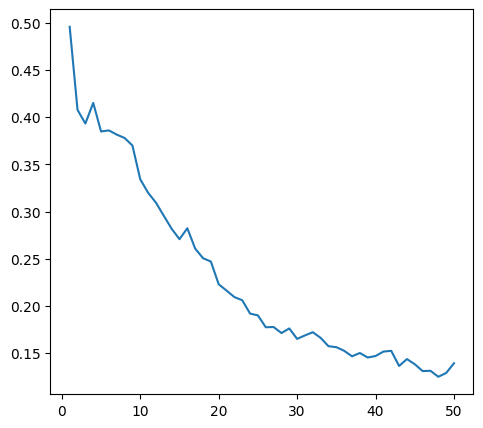

In [44]:
epochs_list = list(range(1, EPOCHS + 1))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_list, train_losses, label='Training Loss')
plt.plot(epochs_list, val_losses, label='Validation Loss')
plt.xticks(ticks=list(range(1, EPOCHS + 1, 1))) 
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.tight_layout()

plt.legend()


plt.subplot(1, 2, 2)
plt.plot(epochs_list, train_dcs, label='Training DICE')
plt.plot(epochs_list, val_dcs, label='Validation DICE')
plt.xticks(ticks=list(range(1, EPOCHS + 1, 1)))  
plt.title('DICE Coefficient over epochs')
plt.xlabel('Epochs')
plt.ylabel('DICE')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

## Test

In [45]:
def mask_to_rle(mask):
    pixels = mask.flatten()
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    return " ".join(map(str, runs))

In [56]:

# Dataset cho tập test
class TestDataset(torch.utils.data.Dataset):
    def __init__(self, image_paths, transform=None):
        self.image_paths = image_paths
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, index):
        img_path = self.image_paths[index]
        img = Image.open(img_path).convert("RGB")
        original_size = img.size  # Kích thước gốc (W, H)
        
        if self.transform:
            img = self.transform(img)
        
        return img, original_size, img_path

In [57]:
# Tải ảnh từ tập test
test_images = os.listdir(test_path)
test_image_paths = [test_path +"/"+ str(test_images[i]) for i in range(len(test_images))]
test_dataset = TestDataset(test_image_paths, transform)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

In [ ]:
# Chuẩn bị để ghi kết quả vào CSV
submission = []

# Dự đoán cho từng ảnh trong tập test
for i, (img, original_size, img_path) in enumerate(test_loader):
    img = img.to(device)  # Chuyển ảnh sang device nếu dùng GPU

    # Dự đoán mặt nạ từ mô hình
    with torch.no_grad():
        output = model(img)
    
    # Dự đoán mặt nạ phân đoạn
    predicted_mask = torch.sigmoid(output)
    predicted_mask = predicted_mask.squeeze(0).cpu().numpy()  # Loại bỏ batch dimension và chuyển về NumPy

    # Chuyển sang binary mask
    predicted_binary = (predicted_mask.squeeze() > 0.4).astype(np.uint8)
    
    # Resize binary mask về kích thước gốc
    original_width, original_height = original_size[0],  original_size[1] # Lấy W, H gốc
    resized_mask = cv2.resize(predicted_binary, (int(original_width), int(original_height)), interpolation=cv2.INTER_CUBIC)
    
    # Chuyển binary mask đã resize sang RLE
    rle_mask = mask_to_rle(resized_mask)

    # Lấy ID từ tên file
    image_id = os.path.splitext(os.path.basename(img_path[0]))[0]

    # Thêm vào danh sách submission
    submission.append({"ID": image_id, "Mask": rle_mask})

# Lưu kết quả vào file CSV
submission_df = pd.DataFrame(submission)
submission_df.to_csv("submission_with_resized_masks.csv", index=False)

print("File submission_with_resized_masks.csv đã được tạo!")


In [34]:
import pandas as pd
submission = []
# Dự đoán cho từng ảnh trong tập test
for i, img in enumerate(test_loader):
    # Chuyển ảnh sang device (nếu dùng GPU)
    img = img.to(device)  # Nếu sử dụng GPU, chuyển img sang device tương ứng
    print(img.shape)
    # Dự đoán mặt nạ từ mô hình
    with torch.no_grad():  # Tắt tính toán gradient
        output = model(img)
    
    # Giả sử output là mặt nạ phân đoạn có giá trị từ 0-1 (như output của U-Net)
    predicted_mask = torch.sigmoid(output)  # Chuyển đầu ra thành giá trị từ 0-1
    
    # Chuyển output thành ảnh (nếu cần)
    predicted_mask = predicted_mask.squeeze(0).cpu().numpy()  # Loại bỏ batch dimension và chuyển về NumPy
    print(predicted_mask.shape)
    break
    
    predicted = (predicted_mask.squeeze() > 0.5).astype(np.uint8)  # Chuyển sang binary mask (0 hoặc 1)
    
    # Chuyển đổi mask sang RLE
    rle_mask = mask_to_rle(predicted)
    # Lấy ID ảnh từ tên file
    image_id = os.path.splitext(os.path.basename(test_image_paths[i]))[0]
    # Thêm vào danh sách submission
    submission.append({"ID": image_id, "Mask": rle_mask})
# Lưu kết quả vào file CSV
submission_df = pd.DataFrame(submission)
submission_df.to_csv("submission5.csv", index=False)
submission_df.shape

torch.Size([1, 3, 512, 512])
(1, 512, 512)


(0, 0)

In [30]:
import pandas as pd
submission = []
# Dự đoán cho từng ảnh trong tập test
for i, img in enumerate(test_loader):
    # Chuyển ảnh sang device (nếu dùng GPU)
    img = img.to(device)  # Nếu sử dụng GPU, chuyển img sang device tương ứng
    print(img.shape)
    # Dự đoán mặt nạ từ mô hình
    with torch.no_grad():  # Tắt tính toán gradient
        output = model(img)
    
    # Giả sử output là mặt nạ phân đoạn có giá trị từ 0-1 (như output của U-Net)
    predicted_mask = torch.sigmoid(output)  # Chuyển đầu ra thành giá trị từ 0-1
    
    # Chuyển output thành ảnh (nếu cần)
    predicted_mask = predicted_mask.squeeze(0).cpu().numpy()  # Loại bỏ batch dimension và chuyển về NumPy
    print(predicted_mask.shape)
    break
    # Hiển thị ảnh và mặt nạ
    
    # plt.subplot(1, 2, 1)
    # plt.imshow(img.squeeze(0).cpu().numpy().transpose(1, 2, 0))  # Hiển thị ảnh gốc
    # plt.title(f"Image {i+1}")
    
    # plt.subplot(1, 2, 2)
    # Áp dụng sigmoid nếu output là giá trị tiếp xúc [0, 1]
    predicted = (predicted_mask.squeeze() > 0.5).astype(np.uint8)  # Chuyển sang binary mask (0 hoặc 1)
    
    # Chuyển đổi mask sang RLE
    rle_mask = mask_to_rle(predicted)
    # Lấy ID ảnh từ tên file
    image_id = os.path.splitext(os.path.basename(test_image_paths[i]))[0]
    
    # Thêm vào danh sách submission
    submission.append({"ID": image_id, "Mask": rle_mask})

    
    # Chuyển ảnh grayscale sang RGB
    # rgb_image = cv2.cvtColor(resized_image, cv2.COLOR_GRAY2RGB)
    # # Thêm vào danh sách submission
    # submission.append({"ID": image_id, "Mask": rle_mask})

    # print("Kích thước ảnh RGB:", rgb_image.shape)
    # plt.imshow(rgb_image)  # Hiển thị mặt nạ dự đoán
    # plt.title(f"Predicted Mask {i+1}")
    
    # plt.show()
    # print(os.path.splitext(os.path.basename(test_image_paths[i]))[0])
    # break
# Lưu kết quả vào file CSV
submission_df = pd.DataFrame(submission)
submission_df.to_csv("submission5.csv", index=False)
submission_df.shape

torch.Size([1, 3, 512, 512])
(1, 512, 512)


(0, 0)

In [123]:
df.head()

,ID,Mask
0,1226,97908 98419 98930 99442 99954 100465 100975 10...
1,1126,2542 3054 3567 4079 4592 5104 5616 6129 6641 7...
2,1208,46861 47372 47883 48394 48903 49413 49924 5043...
3,1166,22470 22982 38409 38917 39429 39941 40453 4096...
4,1102,42754 43265 43277 43777 43788 44289 44801 4531...


In [124]:
df = pd.read_csv("/kaggle/working/submission5.csv")
df['Mask'].nunique()

192

In [94]:


# Dự đoán cho từng ảnh trong tập test
for i, img in enumerate(test_loader):
    img = img.to(device)  # Nếu sử dụng GPU, chuyển img sang device tương ứng

    # Dự đoán mặt nạ từ mô hình
    with torch.no_grad():
        output = model(img)
    
    # Giả sử output là mặt nạ phân đoạn có giá trị từ 0-1 (như output của U-Net)
    predicted_mask = torch.sigmoid(output)
    predicted_mask = predicted_mask.squeeze(0).cpu().numpy()  # Loại bỏ batch dimension và chuyển về NumPy
    
    pred_img = predicted_mask[0]
    threshold = 0.5  # Ngưỡng threshold
    binary_mask = (pred_img > threshold).astype(np.uint8)  # 0 hoặc 1
    
    # Resize ảnh lên kích thước (2016, 3024)
    resized_image = cv2.resize(binary_mask, (3024, 2016), interpolation=cv2.INTER_LINEAR)
    print(resized_image.shape)
    break
    # Chuyển binary mask thành RLE
    rle_mask = mask_to_rle(resized_image)

    # Lấy ID ảnh từ tên file
    image_id = os.path.splitext(os.path.basename(test_image_paths[i]))[0]

    # Thêm vào danh sách submission
    submission.append({"ID": image_id, "Mask": rle_mask})

# Lưu kết quả vào file CSV
submission_df = pd.DataFrame(submission)
submission_df.to_csv("submission2.csv", index=False)

print("File submission.csv đã được tạo!")

(2016, 3024)
File submission.csv đã được tạo!
